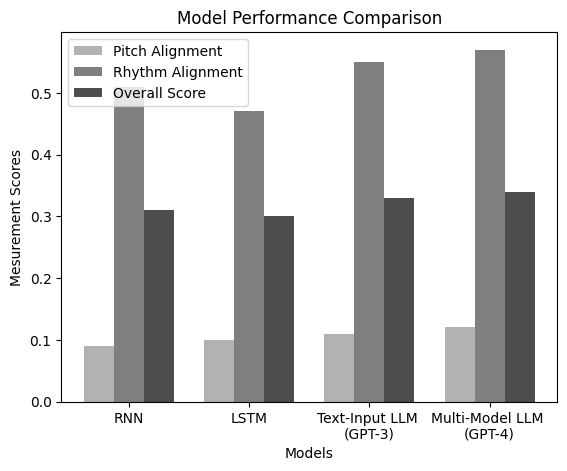

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Model performance data
# models = ['RNN', 'LSTM', 'Text-Input LLM (GPT-3)', 'GPT-4']
# rhythm_alignment = [0.51, 0.47, 0.55, 0.57]
# pitch_alignment = [0.09, 0.10, 0.11, 0.12]
# overall_score = [0.31, 0.30, 0.33, 0.34]

# # Set up bar positions
# bar_width = 0.25
# index = np.arange(len(models))

# # Create bar plots with different saturation levels
# plt.bar(index, rhythm_alignment, width=bar_width, label='Rhythm Alignment', color='black', alpha=0.7)
# plt.bar(index, pitch_alignment, width=bar_width, label='Pitch Alignment', color='black', alpha=0.5, bottom=rhythm_alignment)
# plt.bar(index, overall_score, width=bar_width, label='Overall Score', color='black', alpha=0.3, bottom=np.add(rhythm_alignment, pitch_alignment))

# # Customize the plot
# plt.xlabel('Models')
# plt.ylabel('Scores')
# plt.title('Model Performance Comparison')
# plt.xticks(index + bar_width, models)
# plt.legend()

# # Show the plot
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Model performance data
models = ['RNN', 'LSTM', 'Text-Input LLM \n(GPT-3)', 'Multi-Model LLM \n(GPT-4)']
rhythm_alignment = [0.51, 0.47, 0.55, 0.57]
pitch_alignment = [0.09, 0.10, 0.11, 0.12]
overall_score = [0.31, 0.30, 0.33, 0.34]

# Set up bar positions
bar_width = 0.25
index = np.arange(len(models))

# Create bar plots
plt.bar(index, pitch_alignment, width=bar_width, label='Pitch Alignment',color='black', alpha=0.3)
plt.bar(index + bar_width, rhythm_alignment, width=bar_width, label='Rhythm Alignment',color='black', alpha=0.5)
plt.bar(index + 2 * bar_width, overall_score, width=bar_width, label='Overall Score',color='black', alpha=0.7)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Mesurement Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, models)
plt.legend()

# Show the plot
plt.show()




In [1]:
import math
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
librosa.note_to_hz('F5')

698.4564628660078

In [ ]:
with open('/content/drive/MyDrive/Capstone_LyricsGen/NExT-GPT/trueSongGood_100.json','r') as file:
  samples = json.load(file)
  file.close()

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
len(samples)

100

In [ ]:
def generate_image(sample, index, path):
  notes,durations,texts= [],[],[]
  for j in sample:
    notes.append(j['pitch'])
    durations.append(j['duration'])
    texts.append(j['text'])
  # Function to convert notes to frequencies
  def note_to_freq(note):
      # Implement your logic to map notes to frequencies
      # For simplicity, assuming equal temperament here
      return librosa.note_to_hz(note)
  # Function to generate waveform from notes and durations
  def generate_waveform(notes, durations, sr=44100):
      waveform = np.array([])
      for note, duration in zip(notes, durations):
          freq = note_to_freq(note)
          t = np.linspace(0, duration, int(sr * duration), endpoint=False)
          note_waveform = 0.5 * np.sin(2 * np.pi * freq * t)
          waveform = np.concatenate((waveform, note_waveform))

      return waveform
  # Generate waveform
  sr = 44100
  waveform = generate_waveform(notes, durations, sr)
  # Apply Short-Time Fourier Transform (STFT)
  D = librosa.amplitude_to_db(librosa.stft(waveform), ref=np.max)
  # Display the frequency-wise representation
  plt.figure(figsize=(12, 8))
  librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title('STFT - Frequency-wise Representation')
  output_file_path = os.path.join(path, f"{index}.png")
  plt.savefig(output_file_path)
  # plt.show()


In [ ]:
# MAIN loop for image generation
output_folder = '/content/drive/My Drive/Capstone_LyricsGen/NExT-GPT/Images'
os.makedirs(output_folder, exist_ok=True)
for s in range(len(samples)):
  generate_image(samples[s],s+1,output_folder)
  print('Image Generation:',s+1)

In [ ]:
with open('/content/drive/My Drive/Capstone_LyricsGen/NExT-GPT/testSongGood_100.json','r') as json_file:
  test_samples = json.load(json_file)
  json_file.close()

In [ ]:
for i in range(1,101):
  print(i)
  print(test_samples[i-1])

1
[{'duration': 0.361, 'pitch': 'A4'}, {'duration': 0.09, 'pitch': 'A4'}, {'duration': 0.18, 'pitch': 'A4'}, {'duration': 0.18, 'pitch': 'G#4'}, {'duration': 0.18, 'pitch': 'F#4'}, {'duration': 0.09, 'pitch': 'F#4'}, {'duration': 0.18, 'pitch': 'A#4'}, {'duration': 0.361, 'pitch': 'F#4'}, {'duration': 0.18, 'pitch': 'D#4'}, {'duration': 0.271, 'pitch': 'C#4'}]
2
[{'duration': 0.171, 'pitch': 'F4'}, {'duration': 0.285, 'pitch': 'F4'}, {'duration': 0.228, 'pitch': 'F4'}, {'duration': 0.171, 'pitch': 'F4'}, {'duration': 0.4, 'pitch': 'F4'}, {'duration': 0.228, 'pitch': 'F4'}, {'duration': 0.228, 'pitch': 'F4'}, {'duration': 0.171, 'pitch': 'F4'}, {'duration': 0.4, 'pitch': 'F4'}]
3
[{'duration': 1.497, 'pitch': 'C5'}, {'duration': 0.18, 'pitch': 'G4'}, {'duration': 0.24, 'pitch': 'G4'}, {'duration': 0.599, 'pitch': 'A#4'}, {'duration': 0.24, 'pitch': 'A#4'}, {'duration': 0.539, 'pitch': 'G#4'}, {'duration': 1.378, 'pitch': 'G4'}]
4
[{'duration': 0.223, 'pitch': 'C4'}, {'duration': 0.223, 

In [ ]:
# MAIN loop for Song Storage
output_folder = '/content/drive/My Drive/Capstone_LyricsGen/NExT-GPT/songs_pipeline'
os.makedirs(output_folder, exist_ok=True)
for s in range(len(test_samples)):
  path = os.path.join(output_folder, f"{s+1}.txt")
  with open(path,'w') as file:
    file.write(str(test_samples[s]))

In [ ]:
output_folder = '/content/drive/My Drive/Capstone_LyricsGen/NExT-GPT/songs_pipeline_truth'
os.makedirs(output_folder, exist_ok=True)
for s in range(len(samples)):
  path = os.path.join(output_folder, f"{s+1}.txt")
  with open(path,'w') as file:
    file.write(str(samples[s]))